<a href="https://colab.research.google.com/github/flavio641/CienciasdosDados/blob/main/Aula1_ML_Fernanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




In [ ]:
# Lendo a nossa base de dados
df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Visualizando o total de linhas de colunas
df.shape

(891, 12)

In [ ]:
# Visualizando o tipo de dados de cada coluna
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
mulheres = df.loc[df['Sex']== 'female']['Survived']
taxa_mulheres = sum(mulheres) / len(mulheres)
taxa_mulheres

0.7420382165605095

In [ ]:
homens = df.loc[df['Sex']== 'male']['Survived']
taxa_homens = sum(homens) / len(homens)
taxa_homens

0.18890814558058924

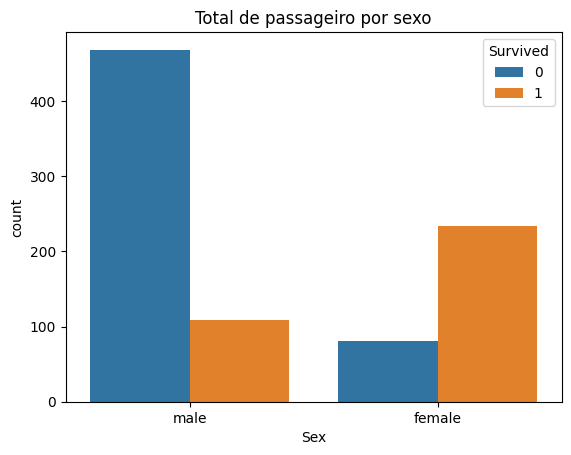

In [ ]:
sns.countplot(x='Sex', data= df, hue= 'Survived')
plt.title('Total de passageiro por sexo');

<Axes: >

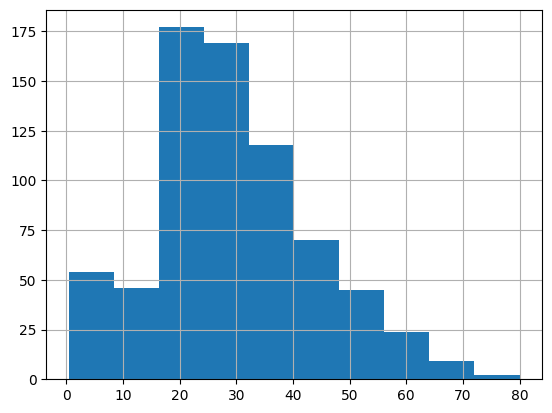

In [ ]:
# Distribuição das idades
df['Age'].hist()

In [ ]:
import plotly.express as px
fig = px.box(df, y= 'Age')
fig.show()

# ***Metodo Cut***

In [ ]:
# Usado para segmentar ou categorizar dados em intervalos

age = pd.cut(x= df['Age'], bins= [0,20,40,60,80, np.inf], labels= ['<=20', '21-40', '41-60', '61-80', '>80'])
age

0      21-40
1      21-40
2      21-40
3      21-40
4      21-40
       ...  
886    21-40
887     <=20
888      NaN
889    21-40
890    21-40
Name: Age, Length: 891, dtype: category
Categories (5, object): ['<=20' < '21-40' < '41-60' < '61-80' < '>80']

In [ ]:
age.value_counts()

21-40    385
<=20     179
41-60    128
61-80     22
>80        0
Name: Age, dtype: int64

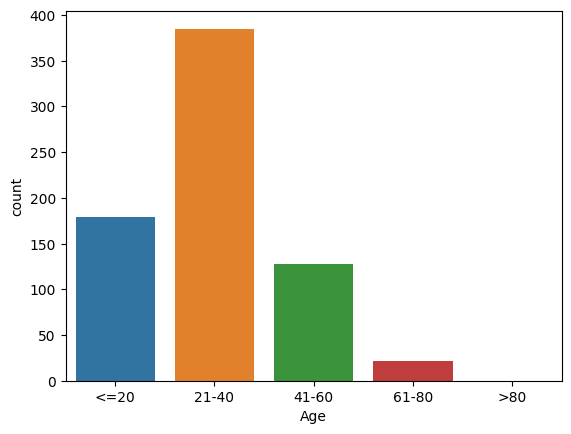

In [ ]:
# Quantidade de pessoas por faixa etária
age = age.sort_values(ascending= True)
sns.countplot(x=age)
plt.show()

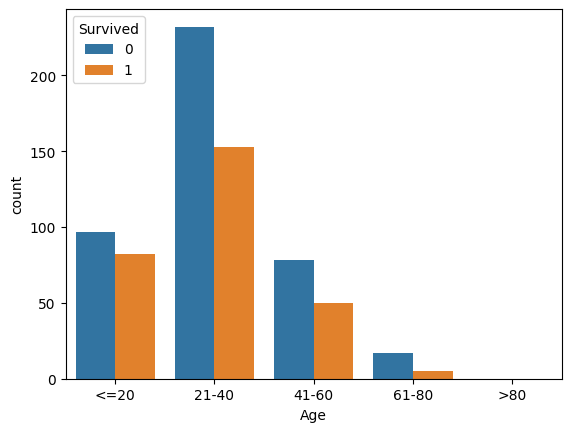

In [ ]:
sns.countplot(x=age, hue= df['Survived'])
plt.show()

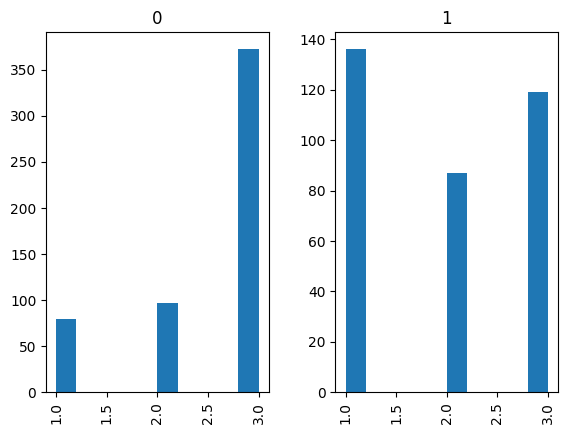

In [ ]:
# Distribuição de pessoas que sobreviveram que não sobreviveram por classe
df['Pclass'].hist(by= df['Survived']);

# ***Correlação de Váriaveis***

In [ ]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<ipython-input-16-525af6cc448f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



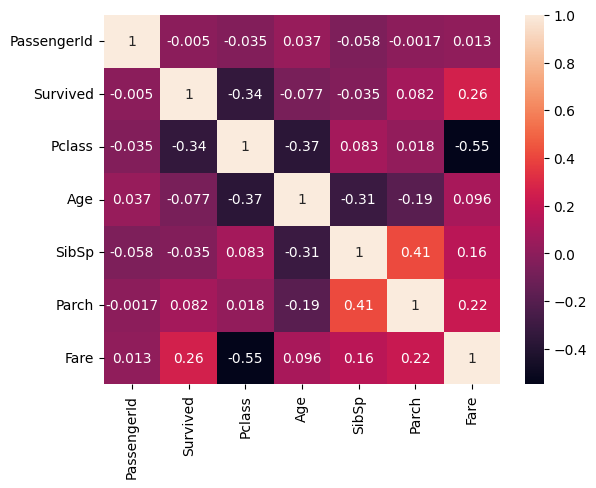

In [ ]:
sns.heatmap(df.corr(), annot= True)
plt.show()

# ***1° Modelagem***

In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_treino = df.dropna(subset= ['Age'])

In [ ]:
# Selecionando as features
X = df_treino.drop(columns= ['PassengerId', 'Survived', 'Name', 'Ticket', 'Embarked', 'Cabin'])
y = df_treino['Survived']

# ***Dividindo os dados de treino e teste***

# *KNN*

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X,y, test_size= 0.3, random_state= 42)

In [ ]:
# Instanciando o algoritmo knn
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Treinando o algoritmo
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Executando o knn com o conjuto de teste
resultado = knn.predict(x_teste)

In [ ]:
print(metrics.classification_report(y_teste, resultado))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       126
           1       0.66      0.54      0.59        89

    accuracy                           0.69       215
   macro avg       0.68      0.67      0.67       215
weighted avg       0.69      0.69      0.69       215



In [ ]:
teste = np.array([[2,1,41.0,1,1,23.0]])

In [ ]:
knn.predict(teste)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



array([0])

# ***Arvore de Decisão***

In [ ]:
#Instanciando o objeto classificador
arvore = DecisionTreeClassifier()

In [ ]:
# Treinando o modelo
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [ ]:
# Executando o modelo
result = arvore.predict(x_teste)


# ***Acurácia: Previsões corretas / Total de Previsões***

In [ ]:
print(metrics.classification_report(y_teste, result))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       126
           1       0.71      0.71      0.71        89

    accuracy                           0.76       215
   macro avg       0.75      0.75      0.75       215
weighted avg       0.76      0.76      0.76       215



In [ ]:
arvore.feature_importances_

array([0.1222603 , 0.32095062, 0.27980545, 0.04582858, 0.01966738,
       0.21148768])

In [ ]:
x_teste.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
149,2,0,42.0,0,0,13.00
407,2,0,3.0,1,1,18.75
53,2,1,29.0,1,0,26.00
369,1,1,24.0,0,0,69.30
818,3,0,43.0,0,0,6.45


In [ ]:
# feature mais importantes
feat_import = pd.Series(arvore.feature_importances_,index= x_treino.columns).sort_values(ascending= False)
feat_import

Sex       0.320951
Age       0.279805
Fare      0.211488
Pclass    0.122260
SibSp     0.045829
Parch     0.019667
dtype: float64

In [ ]:
def feature_impor(feature_list):
  plt.figure(figsize= (14,8))
  sns.barplot(x= feature_list, y= feature_list.index)
  plt.xlabel('Feature importante Score')
  plt.ylabel('Features')
  plt.title('Visualizando a importancia das variáveis')
  plt.show()

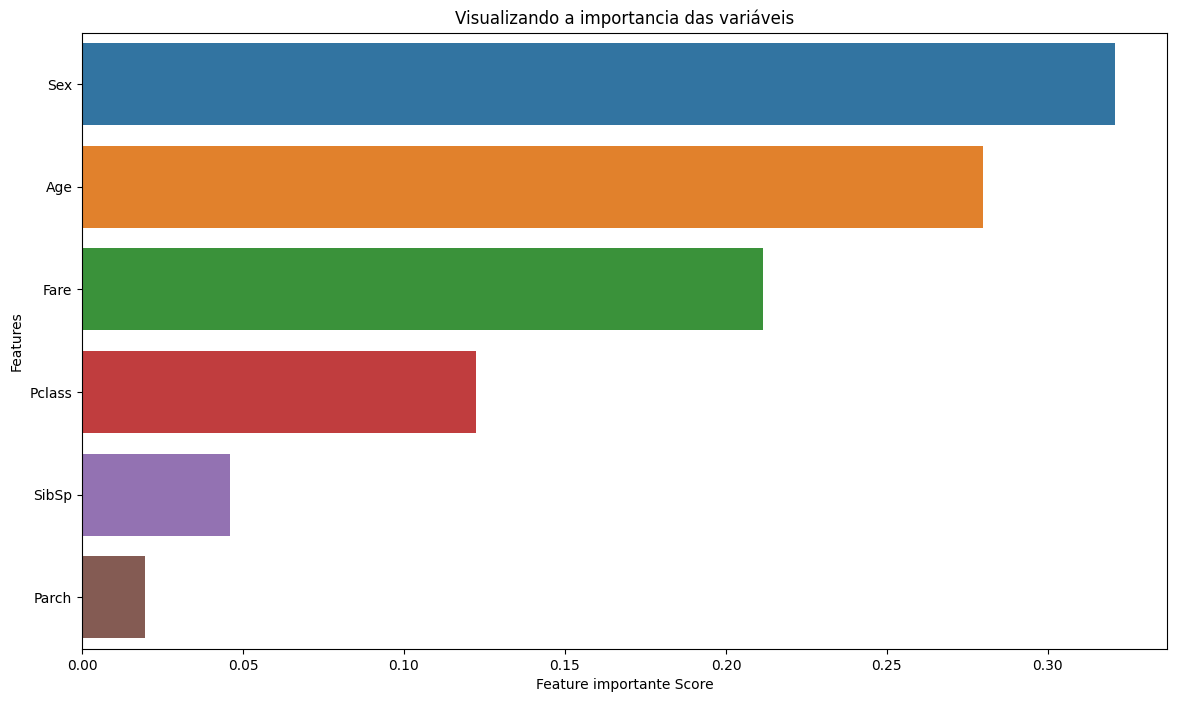

In [ ]:
feature_impor(feat_import)

# ***Random Forest***

In [ ]:
random_clf = RandomForestClassifier()

In [ ]:
random_clf.fit(x_treino,y_treino)

RandomForestClassifier()

In [ ]:
results = random_clf.predict(x_teste)

In [ ]:
print(metrics.classification_report(y_teste, results))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       126
           1       0.76      0.71      0.73        89

    accuracy                           0.79       215
   macro avg       0.78      0.77      0.78       215
weighted avg       0.78      0.79      0.78       215



In [ ]:
feat_import = pd.Series(random_clf.feature_importances_,index= x_treino.columns).sort_values(ascending= False)
feat_import

Age       0.299759
Sex       0.270928
Fare      0.257214
Pclass    0.094462
SibSp     0.042768
Parch     0.034869
dtype: float64

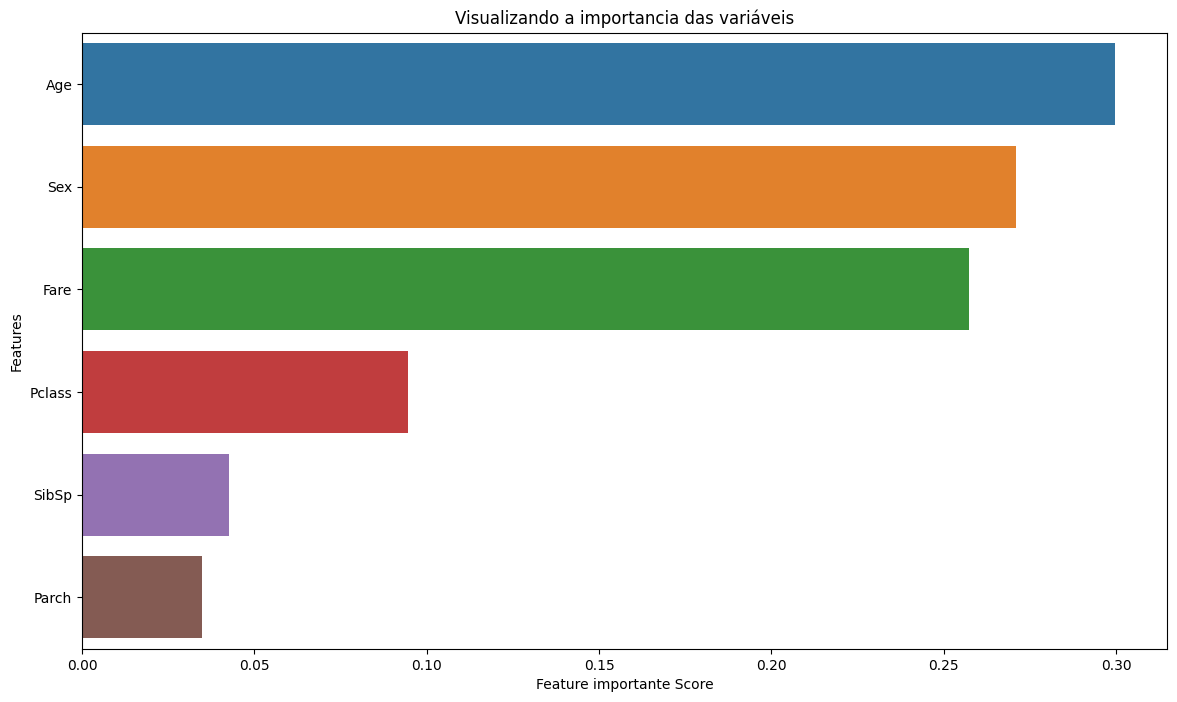

In [ ]:
feature_impor(feat_import)

In [ ]:
# Selecionando um árvore na floresta
tree0 = random_clf.estimators_[0]
tree0

DecisionTreeClassifier(max_features='sqrt', random_state=340282162)

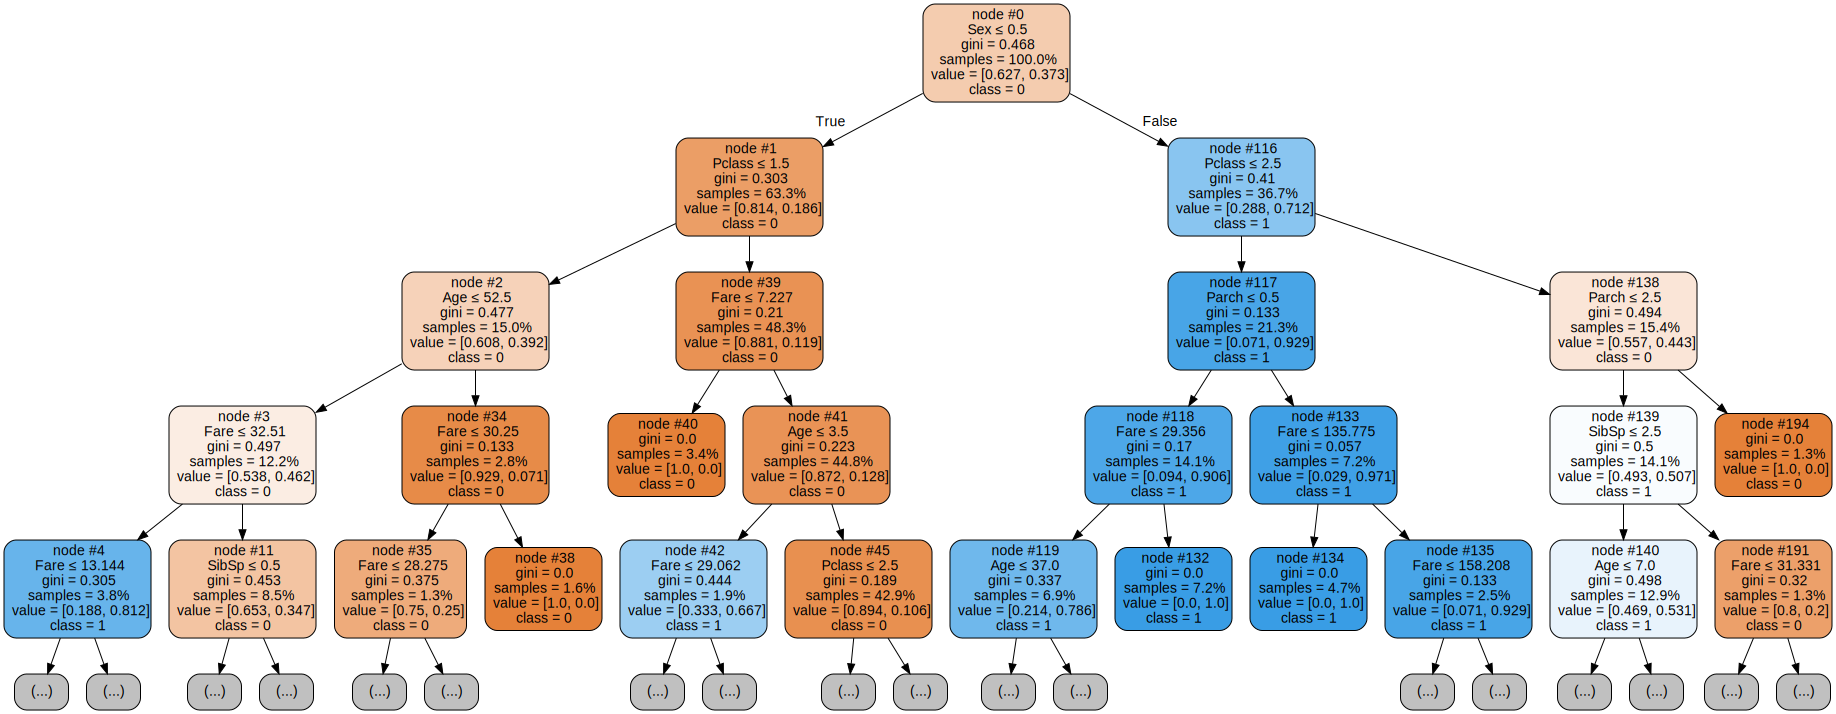

In [ ]:
dot_data = export_graphviz(
                tree0,
                max_depth = 4,
                out_file = None,
                feature_names = x_treino.columns,
                class_names = ['0','1'],
                filled = True, rounded= True,
                proportion = True,
                node_ids = True,
                rotate = False,
                label = 'all',
                special_characters = True

)
graph = graphviz.Source(dot_data)
graph

***Padronização: na padronização as caracteristicas são transformadas de que tenha uma média 0 e um desvio padrão igual a 1. Isso significa que os dados resultantes tem uma distribuição com média 0 em uma variância unitária.***
**Normalização: na normalização as caracteristicas são dimensionadas para um intervalo especificos geralmente 0 e 1.Isso coloca todos os valores das as caracteristicas em uma escala comum entre 0 e 1**

In [ ]:
cols = x_treino.columns
cols

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
sca = preprocessing.StandardScaler()

In [ ]:
x_treino = sca.fit_transform(x_treino)

In [ ]:
x_treino = pd.DataFrame(x_treino, columns= cols)
x_treino

,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.935746,-0.747914,-0.629186,-0.54619,-0.494954,-0.584752
1,-0.252390,1.337053,-1.706077,0.57541,1.770935,-0.158742
2,0.935746,-0.747914,-0.124394,-0.54619,-0.494954,-0.602502
3,0.935746,-0.747914,1.928428,-0.54619,-0.494954,-0.602052
4,-1.440525,-0.747914,0.649621,-0.54619,-0.494954,-0.088461
...,...,...,...,...,...,...
494,-1.440525,-0.747914,1.053455,0.57541,-0.494954,0.564069
495,-0.252390,-0.747914,-0.359964,-0.54619,-0.494954,-0.477709
496,-1.440525,1.337053,0.716927,-0.54619,-0.494954,2.149713
497,0.935746,-0.747914,0.178481,0.57541,0.637991,-0.314982


In [ ]:
x_teste = sca.fit_transform(x_teste)

In [ ]:
x_teste = pd.DataFrame(x_teste, columns= cols)
x_teste

,Pclass,Sex,Age,SibSp,Parch,Fare
0,-0.354931,-0.785201,1.017311,-0.567320,-0.537661,-0.315985
1,-0.354931,-0.785201,-1.856167,0.424337,0.746751,-0.228528
2,-0.354931,1.273558,0.059485,0.424337,-0.537661,-0.118256
3,-1.566203,1.273558,-0.308910,-0.567320,-0.537661,0.540333
4,0.856341,-0.785201,1.090989,-0.567320,-0.537661,-0.415610
...,...,...,...,...,...,...
210,0.856341,-0.785201,-0.272071,-0.567320,-0.537661,-0.391274
211,-1.566203,-0.785201,3.153999,-0.567320,-0.537661,0.239241
212,0.856341,1.273558,-1.929846,-0.567320,0.746751,-0.326822
213,0.856341,-0.785201,-1.561452,3.399311,0.746751,-0.070725


# ***Testando Vários Modelos***

In [ ]:
log_model = LogisticRegression().fit(x_treino, y_treino)
tree_model = DecisionTreeClassifier().fit(x_treino,y_treino)
random_model = RandomForestClassifier().fit(x_treino,y_treino)
extra_model = ExtraTreesClassifier().fit(x_treino,y_treino)
xgb_model = XGBClassifier().fit(x_treino,y_treino)
knn_model = KNeighborsClassifier().fit(x_treino,y_treino)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
def evaluate(model, x_teste, y_teste):
  pred = model.predict(x_teste)
  print('Acurácia: ', accuracy_score(y_teste, pred))
  print('Recall: ', recall_score(y_teste, pred))
  print('Precision: ', precision_score(y_teste, pred))
  print('F1Score: ', f1_score(y_teste, pred))

# ***Regressão Logistica***

In [ ]:
evaluate(log_model, x_teste, y_teste)

Acurácia:  0.7674418604651163
Recall:  0.651685393258427
Precision:  0.7532467532467533
F1Score:  0.6987951807228916


In [ ]:
pred = log_model.predict(x_teste)

In [ ]:
confusion_matrix(y_teste, pred)

array([[107,  19],
       [ 31,  58]])

In [ ]:
def confusionmatrix(y_teste, y_pred):
  plt.figure(figsize=(5,4))
  sns.heatmap(confusion_matrix(y_teste,y_pred), annot= True, fmt= 'g')
  plt.xlabel('Predição')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')

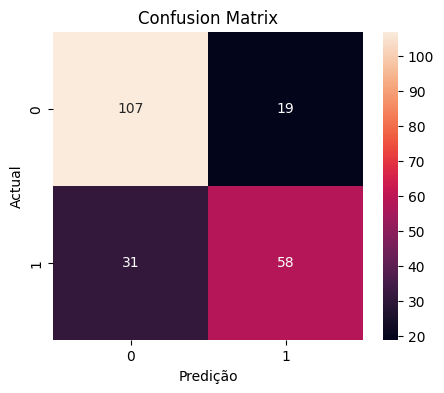

In [ ]:
confusionmatrix(y_teste, pred)

# ***Tree Model***

In [ ]:
evaluate(tree_model, x_teste, y_teste)

Acurácia:  0.7488372093023256
Recall:  0.6741573033707865
Precision:  0.7058823529411765
F1Score:  0.6896551724137931


In [ ]:
pred_tree = tree_model.predict(x_teste)

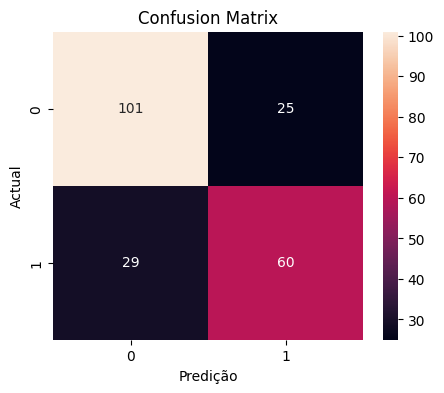

In [ ]:
confusionmatrix(y_teste, pred_tree)

# ***Random Forest***

In [ ]:
evaluate(random_model, x_teste, y_teste)

Acurácia:  0.8093023255813954
Recall:  0.651685393258427
Precision:  0.8529411764705882
F1Score:  0.7388535031847134


In [ ]:
pred_random = random_model.predict(x_teste)

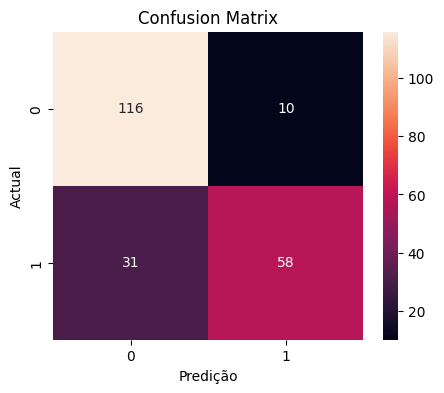

In [ ]:
confusionmatrix(y_teste, pred_random)

# ***Extra Tree***

In [ ]:
evaluate(extra_model, x_teste, y_teste)

Acurácia:  0.7953488372093023
Recall:  0.6404494382022472
Precision:  0.8260869565217391
F1Score:  0.7215189873417721


In [ ]:
extra_pred = extra_model.predict(x_teste)

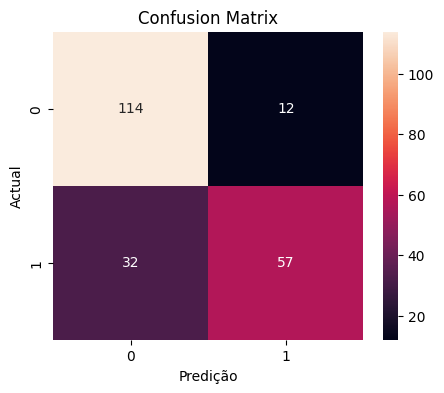

In [ ]:
confusionmatrix(y_teste, extra_pred)

# ***XGboost***

In [ ]:
evaluate(xgb_model, x_teste, y_teste)

Acurácia:  0.6325581395348837
Recall:  0.33707865168539325
Precision:  0.6
F1Score:  0.4316546762589928


In [ ]:
xgb_pred = xgb_model.predict(x_teste)

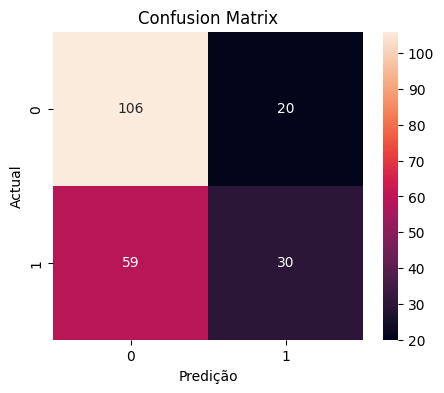

In [ ]:
confusionmatrix(y_teste, xgb_pred)

# ***KNN***

In [ ]:
evaluate(knn_model, x_teste, y_teste)

Acurácia:  0.7906976744186046
Recall:  0.6741573033707865
Precision:  0.7894736842105263
F1Score:  0.7272727272727273


In [ ]:
knn_pred = knn_model.predict(x_teste)

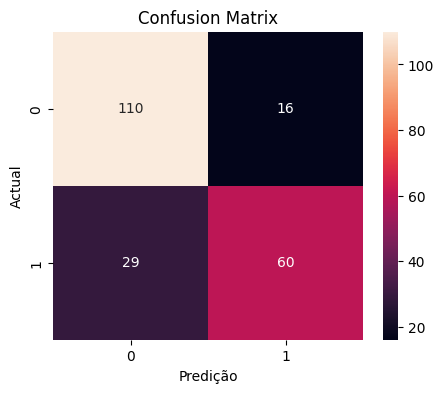

In [ ]:
confusionmatrix(y_teste, knn_pred)

# ***Otimizando o Modelo***

In [ ]:
pram_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3,4,5,6,7,8]
}

In [ ]:
knn_mod = GridSearchCV(estimator= xgb_model, param_grid= pram_grid, cv= 5)
knn_mod.fit(x_treino, y_treino)

In [ ]:
knn_mod.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [ ]:
randon_model =  RandomForestClassifier(n_estimators= 300, max_depth= 7).fit(x_treino,y_treino)

In [ ]:
evaluate(randon_model, x_teste, y_teste)

Acurácia:  0.813953488372093
Recall:  0.6404494382022472
Precision:  0.8769230769230769
F1Score:  0.7402597402597403


# ***Salvando o Modelo***

In [ ]:
import joblib

In [ ]:
joblib.dump(randon_model, 'rand_mod.pkl')

['rand_mod.pkl']

In [ ]:
x_teste

,Pclass,Sex,Age,SibSp,Parch,Fare
0,-0.354931,-0.785201,1.017311,-0.567320,-0.537661,-0.315985
1,-0.354931,-0.785201,-1.856167,0.424337,0.746751,-0.228528
2,-0.354931,1.273558,0.059485,0.424337,-0.537661,-0.118256
3,-1.566203,1.273558,-0.308910,-0.567320,-0.537661,0.540333
4,0.856341,-0.785201,1.090989,-0.567320,-0.537661,-0.415610
...,...,...,...,...,...,...
210,0.856341,-0.785201,-0.272071,-0.567320,-0.537661,-0.391274
211,-1.566203,-0.785201,3.153999,-0.567320,-0.537661,0.239241
212,0.856341,1.273558,-1.929846,-0.567320,0.746751,-0.326822
213,0.856341,-0.785201,-1.561452,3.399311,0.746751,-0.070725


In [ ]:
teste = np.array([[-0.354931,	-0.785201,	1.017311,	-0.567320,	-0.537661,	-0.315985]])

In [ ]:
rande = joblib.load('rand_mod.pkl')

In [ ]:
rande.predict(teste)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([0])